In [37]:
import pandas as pd
import numpy 
import requests
from raptorfinance import RaptorFinance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime

In [38]:
sbi = RaptorFinance('SBIN.NS', result_range='1mo', interval='15m', dropna='True').result

c:\programdata\miniconda3\lib\site-packages\raptorfinance\__init__.py:71: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  temp_list.append(pd.np.nan)


In [33]:
tech_list = ['SBIN.NS']
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,"yahoo", start, end)

In [34]:
company_list = [sbi]
company_name = ["SBIN.NS"]
for company, com_name in zip(company_list, company_name):
    company["SBI"] = com_name
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Volume,SBI
2021-06-21 14:00:00,413.85,416.35,413.50,416.15,1392814,SBIN.NS
2021-06-21 14:15:00,416.25,417.80,415.90,417.75,1572072,SBIN.NS
2021-06-21 14:30:00,417.65,420.30,417.55,419.55,2330602,SBIN.NS
2021-06-21 14:45:00,419.50,420.00,418.30,418.70,1092108,SBIN.NS
2021-06-21 15:00:00,418.65,421.00,417.65,420.10,1980123,SBIN.NS
2021-06-21 15:15:00,420.10,420.90,418.40,419.15,2013476,SBIN.NS
2021-06-22 09:15:00,422.95,424.60,422.15,423.70,3198840,SBIN.NS
2021-06-22 09:30:00,423.65,424.50,422.40,424.00,1946291,SBIN.NS
2021-06-22 09:45:00,423.90,424.45,423.90,424.20,181247,SBIN.NS
2021-06-22 09:47:11,424.20,424.20,424.20,424.20,0,SBIN.NS


In [7]:
sbi.describe()

,Open,High,Low,Close,Volume
count,525.000000,525.000000,525.000000,525.000000,5.250000e+02
mean,424.571619,425.499619,423.656571,424.589333,1.606893e+06
std,8.978403,8.841787,9.066303,8.953266,1.615832e+06
min,404.250000,406.450000,400.700000,404.050000,2.410950e+05
25%,417.200000,418.200000,416.500000,417.250000,7.295750e+05
50%,426.450000,427.250000,425.750000,426.500000,1.196201e+06
75%,431.300000,432.000000,430.250000,431.300000,1.870274e+06
max,441.300000,441.950000,440.350000,441.300000,1.357297e+07


In [8]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525 entries, 2021-05-24 09:15:00 to 2021-06-21 15:15:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    525 non-null    float64
 1   High    525 non-null    float64
 2   Low     525 non-null    float64
 3   Close   525 non-null    float64
 4   Volume  525 non-null    int64  
 5   SBI     525 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 28.7+ KB


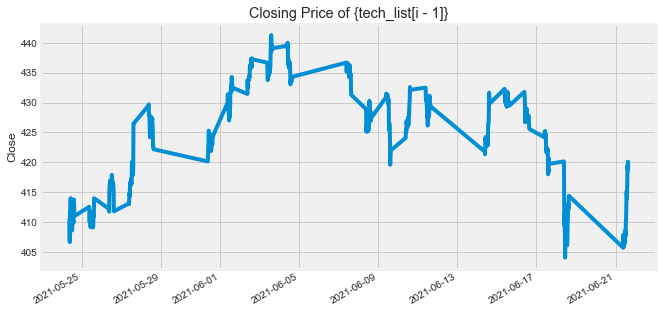

In [9]:
plt.figure(figsize=(18, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title("Closing Price of {tech_list[i - 1]}")
plt.tight_layout()

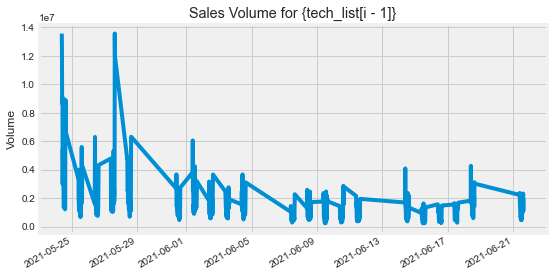

In [10]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title("Sales Volume for {tech_list[i - 1]}")
plt.tight_layout()

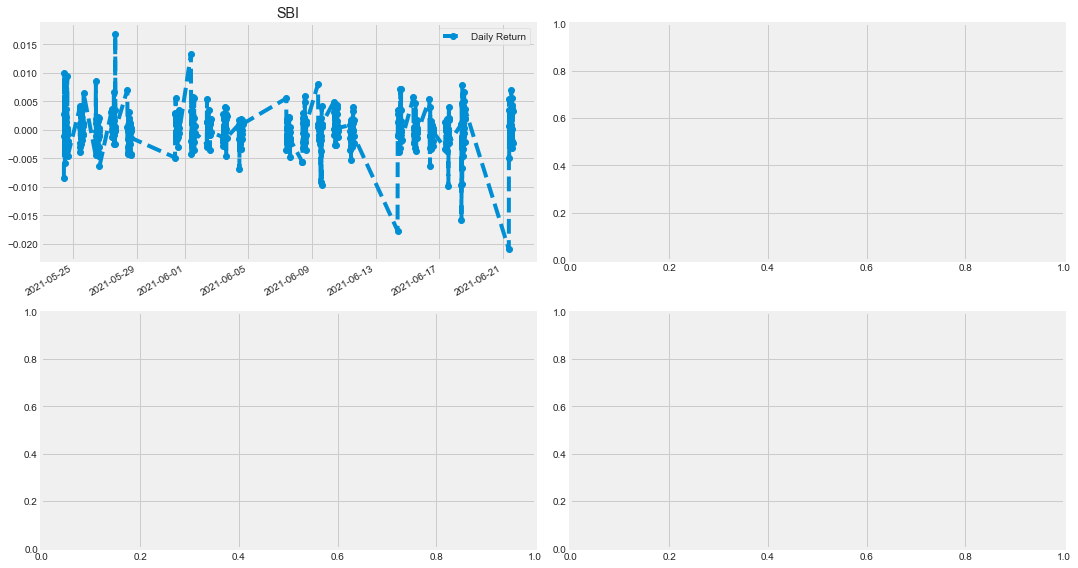

In [16]:
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
sbi['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('SBI')
fig.tight_layout()


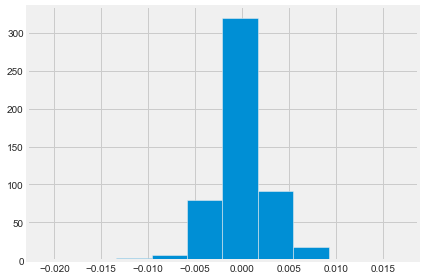

In [17]:
sbi['Daily Return'].hist()
plt.tight_layout()

In [18]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Close']
# Let's take a quick look
closing_df.head() 

Symbols,SBIN.NS
Date,
2020-06-22,187.699997
2020-06-23,192.449997
2020-06-24,184.600006
2020-06-25,185.250000
2020-06-26,184.600006


In [19]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,SBIN.NS
Date,
2020-06-22,NaN
2020-06-23,0.025306
2020-06-24,-0.040790
2020-06-25,0.003521
2020-06-26,-0.003509


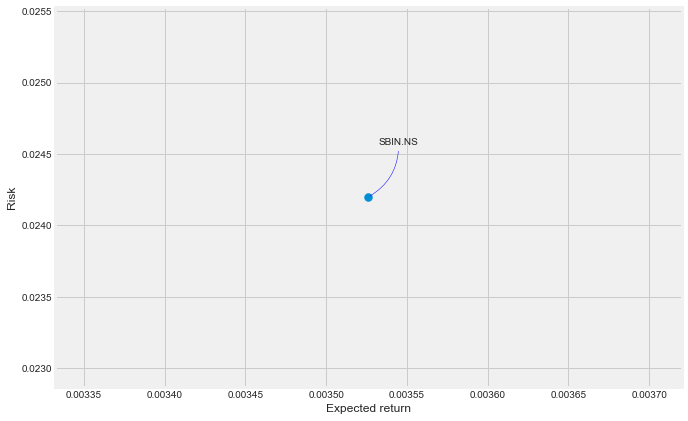

In [20]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [21]:
df = DataReader('SBIN.NS', data_source='yahoo', start='2012-01-01', end='2021-10-31')
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,163.600006,161.139999,162.899994,162.764999,14464990.0,147.880875
2012-01-03,171.000000,164.300003,164.399994,170.565002,21341020.0,154.967636
2012-01-04,171.389999,167.520004,171.199997,169.604996,22241630.0,154.095413
2012-01-05,171.854996,168.005005,169.600006,169.244995,21344840.0,153.768341
2012-01-06,170.759995,165.804993,167.500000,167.274994,21137420.0,151.978455
...,...,...,...,...,...,...
2021-06-15,432.799988,428.000000,429.200012,429.500000,16413658.0,429.500000
2021-06-16,432.750000,425.000000,428.000000,425.950012,19701175.0,425.950012
2021-06-17,425.950012,416.600006,421.000000,420.250000,23048331.0,420.250000


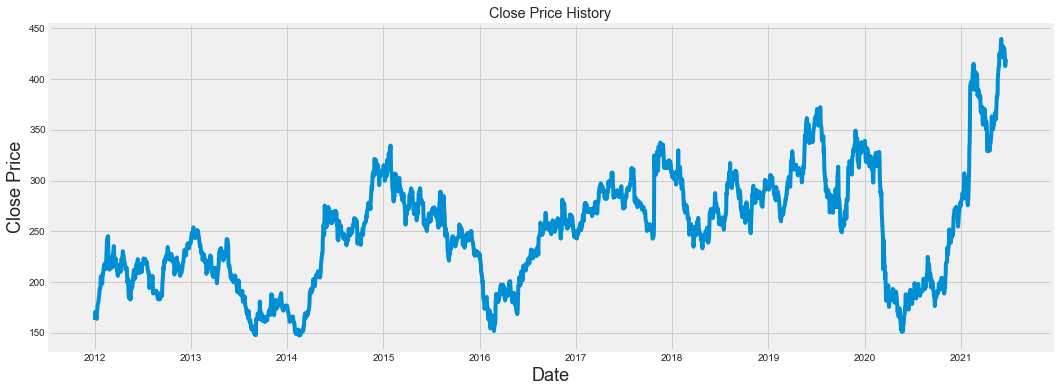

In [22]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [23]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2214

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0527045 ],
       [0.07939034],
       [0.07610591],
       ...,
       [0.93362758],
       [0.9084813 ],
       [0.93191695]])

In [25]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0527045 , 0.07939034, 0.07610591, 0.07487425, 0.06813437,
       0.05598894, 0.07834683, 0.08667764, 0.09949024, 0.10349311,
       0.11728078, 0.12672344, 0.13402786, 0.14051111, 0.15712137,
       0.15973863, 0.19405386, 0.19993843, 0.19398542, 0.17504873,
       0.20117009, 0.20666119, 0.20493344, 0.21538542, 0.2357419 ,
       0.23247459, 0.24090798, 0.24304627, 0.23890658, 0.22431491,
       0.24857163, 0.265849  , 0.29995896, 0.32277876, 0.33489   ,
       0.26733724, 0.26921894, 0.25043621, 0.2221253 , 0.25921175,
       0.26478842, 0.25493517, 0.26449759, 0.24032638, 0.23067845,
       0.22852304, 0.25755243, 0.28642787, 0.29214137, 0.3014814 ,
       0.28249339, 0.2580656 , 0.23399708, 0.24419242, 0.25975916,
       0.23504054, 0.23714463, 0.22027779, 0.22428066, 0.20720861])]
[0.20108452306455626]

[array([0.0527045 , 0.07939034, 0.07610591, 0.07487425, 0.06813437,
       0.05598894, 0.07834683, 0.08667764, 0.09949024, 0.10349311,
       0.11728078, 0.12672344, 0.13

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2154/2154 [==============================] - 66s 17ms/step - loss: 0.0041


In [27]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

12.979748851641657

<ipython-input-30-097ff9bce2fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


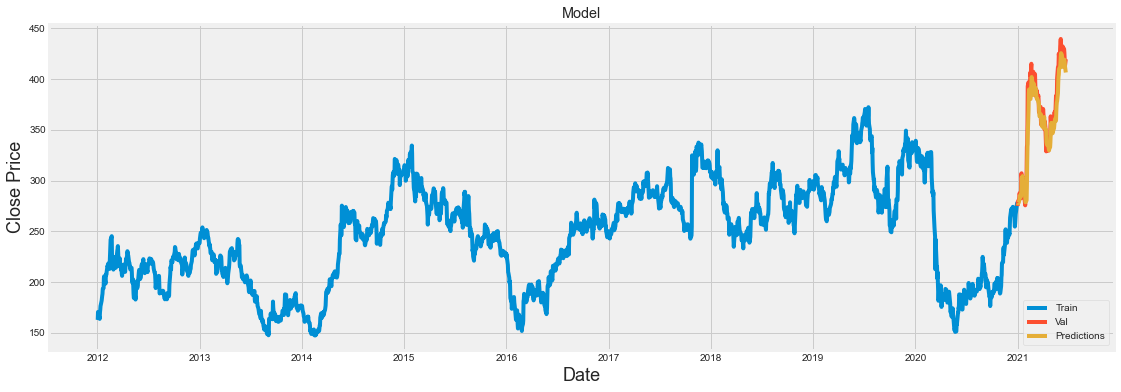

In [30]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(17,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
valid

,Close,Predictions
Date,,
2020-12-31,274.950012,277.986877
2021-01-01,279.399994,277.591583
2021-01-04,281.049988,278.379822
2021-01-05,281.750000,279.667297
2021-01-06,285.049988,280.755371
...,...,...
2021-06-15,429.500000,419.025696
2021-06-16,425.950012,419.197388
2021-06-17,420.250000,417.169189
